In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("spam.csv", encoding = 'latin')

In [4]:
data.shape

(5572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [3]:
data.head

<bound method NDFrame.head of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  

Seems like there are 3 unnamed columns which is having NaN values

##Data Cleaning

In [4]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3' ,'Unnamed: 4'], inplace=True)

In [5]:
#renaming the columns
data.rename(columns={'v1': 'target', 'v2': 'text'},inplace = True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Normalizing the lables in target variable to numerical format
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
data['target'] = encoder.fit_transform(data['target'])
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


- 0: ham (Non-spam)
- 1: Spam

In [10]:
#checking for duplicate values
data.duplicated().sum()

403

In [8]:
#removing all the duplicates
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [12]:
data.shape

(5169, 2)

##EDA

In [9]:
data['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

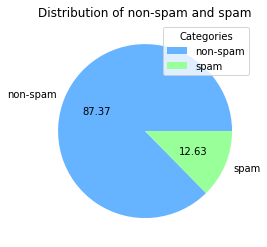

In [10]:
import matplotlib.pyplot as plt
colors = ['#66b3ff', '#99ff99']
plt.pie(data['target'].value_counts(), labels = ['non-spam','spam'], autopct="%0.2f", colors = ['#66b3ff', '#99ff99'])
plt.title('Distribution of non-spam and spam')
plt.legend(['non-spam', 'spam'], title='Categories', loc='upper right')
plt.show()

Three by fourth of the data are non spam mails.

In [10]:
import nltk

In [11]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nived\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
#Counting the number of characters in each text
data['no_of_char'] = data['text'].apply(len)
data.head()

,target,text,no_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
#Counting the number of words in each text
data['no_of_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,target,text,no_of_char,no_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [14]:
##Counting the number of sentences in each text
data['no_of_sent'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
data.head()

,target,text,no_of_char,no_of_words,no_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Now describing the numerical features

In [15]:
data[['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [16]:
#For non-spam(ham) mails
data[data['target'] == 0][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [17]:
#For spam mails
data[data['target'] == 1][['no_of_char','no_of_words','no_of_sent']].describe()

,no_of_char,no_of_words,no_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [19]:
import seaborn as sns

c:\Users\nived\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


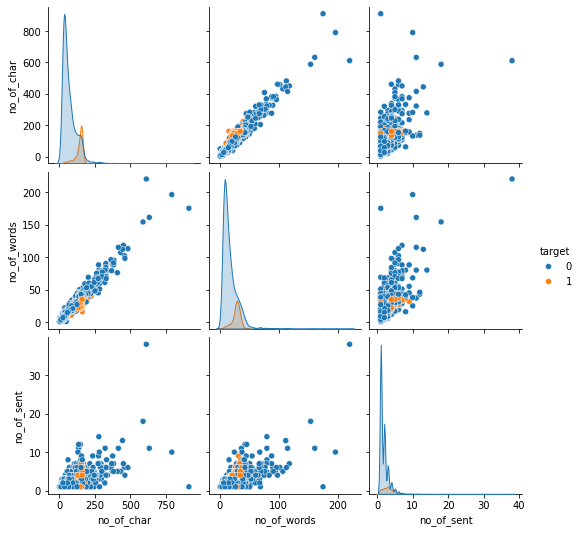

In [20]:
sns.pairplot(data, hue='target')

<Axes: title={'center': 'Distribution of character counts for span and ham mails'}, xlabel='no_of_char', ylabel='Count'>

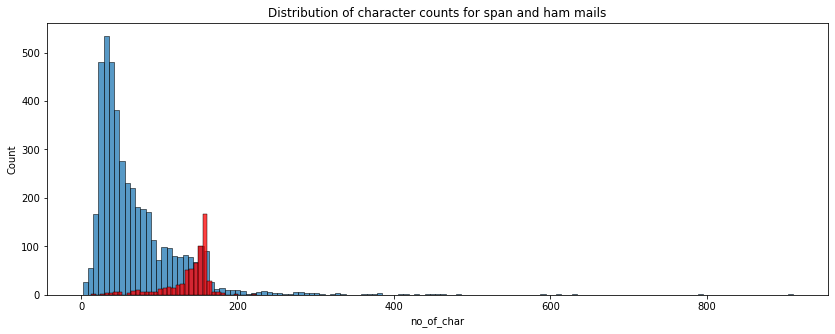

In [21]:
plt.figure(figsize=(14,5))
plt.title('Distribution of character counts for span and ham mails')
sns.histplot(data[data['target'] == 0]['no_of_char'])
sns.histplot(data[data['target'] == 1]['no_of_char'], color = 'red')

<Axes: title={'center': 'Distribution of character counts for span and ham mails'}, xlabel='no_of_words', ylabel='Count'>

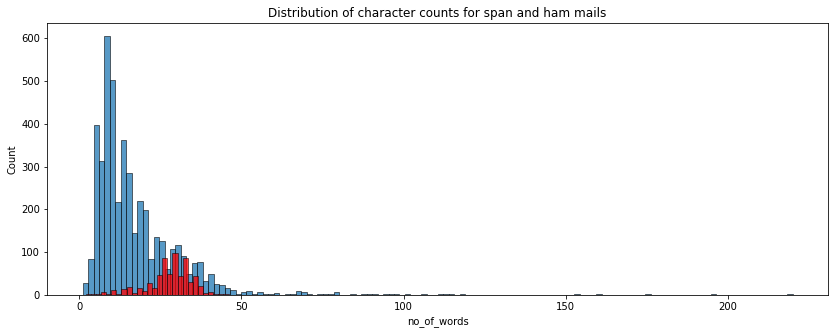

In [22]:
plt.figure(figsize=(14,5))
plt.title('Distribution of character counts for span and ham mails')
sns.histplot(data[data['target'] == 0]['no_of_words'])
sns.histplot(data[data['target'] == 1]['no_of_words'], color = 'red')

###DATA PREPROCESSING

- Normalizing the characters
- Tokenization
- Special character removal
- Stopword removal
- Stemming and Lemmatization

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nived\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [20]:
ps = PorterStemmer()

In [21]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [22]:
data['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [23]:
transform_text("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")

'free entri in 2 a wkli comp to win fa cup final tkt 21st may text fa to 87121 to receiv entri question std txt rate t c appli 08452810075over18'

In [24]:
data['transformed_text'] = data['text'].apply(transform_text)
data.head()

,target,text,no_of_char,no_of_words,no_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width = 900, height = 600, min_font_size = 10, background_color = 'white')

(-0.5, 899.5, 599.5, -0.5)

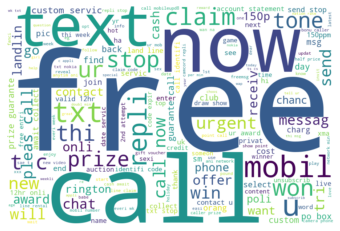

In [34]:
#For spam mails
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep = " "))

plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 899.5, 599.5, -0.5)

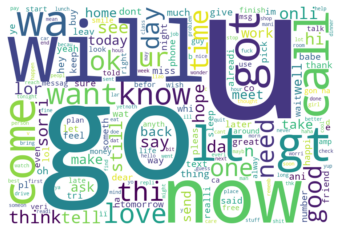

In [36]:
# For non-spam(ham) mails
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))

plt.imshow(spam_wc, interpolation='bilinear')
plt.axis('off')

In [25]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
len(spam_corpus)

14475

In [26]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [40]:
len(ham_corpus)

62812

##Model Building

In [27]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [28]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [44]:
X.shape

(5169, 3000)

In [29]:
y = data['target'].values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [33]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [34]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8771760154738878
[[792 104]
 [ 23 115]]
0.5251141552511416


In [35]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[896   0]
 [ 33 105]]
1.0


In [36]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[893   3]
 [ 17 121]]
0.9758064516129032


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [39]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [40]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [41]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [42]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9816247582205029, 0.983739837398374)

In [43]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.84375
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9459459459459459
For  RF
Accuracy -  0.9709864603481625
Precision -  1.0
For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.928
For  BgC
Accuracy -  0.965183752417795
Precision -  0.9180327868852459
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.9593810444874274
Precision -  0.9528301886792453


In [44]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [45]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.968085,1.000000
5,RF,0.970986,1.000000
0,SVC,0.981625,0.983740
8,ETC,0.978723,0.983333
9,GBDT,0.959381,0.952830
4,LR,0.962282,0.945946
6,AdaBoost,0.970019,0.928000
7,BgC,0.965184,0.918033
3,DT,0.930368,0.843750


In [46]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [47]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.968085
2,RF,Accuracy,0.970986
3,SVC,Accuracy,0.981625
4,ETC,Accuracy,0.978723
5,GBDT,Accuracy,0.959381
6,LR,Accuracy,0.962282
7,AdaBoost,Accuracy,0.970019
8,BgC,Accuracy,0.965184
9,DT,Accuracy,0.930368


I am choosing "ExtraTreesClassifier" for building the web application since the precision and accuracy seems to be almost same.

In [50]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))